Using the HOG algorithm, extract features from images in the cat and dog dataset, apply various classification methods, and observe the results 

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.animation as animation

In [4]:
cats_dir = r'D:/Datasets/cats'
dogs_dir = r'D:/Datasets/dogs'
image_size = (64, 64)
images = []
labels = []
# Qovluqlardan şəkilləri yükləmək
for label, directory in enumerate([cats_dir, dogs_dir]):
    for file in os.listdir(directory):
        if file.endswith(('.png', '.jpg', '.jpeg')):  # Yalnız şəkil fayllarını nəzərə al (only images)
            img_path = os.path.join(directory, file)
            img = imread(img_path)
            img_gray = rgb2gray(resize(img, image_size))
            images.append(img_gray)
            labels.append(label)
images = np.array(images)
labels = np.array(labels)

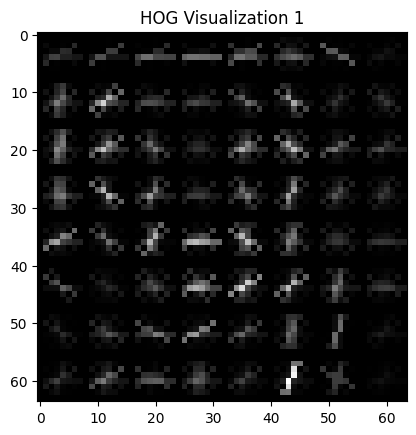

In [5]:
# 2. HOG Tətbiqi
def apply_hog(image):
    return hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)

hog_features = np.array([apply_hog(img) for img in images])

# 3. Random 30 Şəkil üçün Animasiya
random_indices = np.random.choice(len(images), 100, replace=False)
selected_images = images[random_indices]
selected_hog_images = [hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)[1] for img in selected_images]

fig, ax = plt.subplots()
def update(frame):
    ax.clear()
    ax.imshow(selected_hog_images[frame], cmap='gray')
    ax.set_title(f"HOG Visualization {frame + 1}")

ani = animation.FuncAnimation(fig, update, frames=len(selected_hog_images), interval=500)
ani.save("hog_animation.mp4")

SVM 

In [6]:
# 4. SVM ilə Klassifikasiya
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

# SVM parametrlərini optimallaşdırmaq üçün GridSearchCV istifadə edin
param_grid = {
    'C': [10],
    'gamma': [0.1],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)

# Ən yaxşı nəticələri tapmaq
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Test və Nəticələr
svm_predictions = best_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  39.9s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  38.8s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  38.8s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  40.6s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  41.1s
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVM Accuracy: 75.77%


Result

In [7]:
test_image_path = 'Dataset/cats/cat.1003.jpg'  # Test ediləcək şəkilin tam yolu
test_image = imread(test_image_path)

# Şəkili hazırlamaq
test_image_resized = resize(test_image, image_size)
test_image_gray = rgb2gray(test_image_resized)
test_image_hog = apply_hog(test_image_gray).reshape(1, -1)

# Test nəticəsi
test_prediction = best_model.predict(test_image_hog).item()
class_label = "Cat" if test_prediction == 0 else "Dog"
print(f"Test Image Prediction: {class_label}")

Test Image Prediction: Cat


KNN metodu tətbiq edirik

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# HOG xüsusiyyətləri artıq 'hog_features' massivindədir


# 1. Dataseti təlim və test dəstlərinə bölmək
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

# 2. KNN modeli yaratmaq
knn = KNeighborsClassifier(n_neighbors=5)  # k = 5
knn.fit(X_train, y_train)

# 3. Modeli test dəsti ilə qiymətləndirmək
y_pred = knn.predict(X_test)

# 4. Nəticələr
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelin dəqiqliyi: {accuracy * 100:.2f}%")
print("\nƏtraflı Qiymətləndirmə:")
print(classification_report(y_test, y_pred))

Modelin dəqiqliyi: 55.53%

Ətraflı Qiymətləndirmə:
              precision    recall  f1-score   support

           0       0.80      0.18      0.29       819
           1       0.52      0.95      0.68       782

    accuracy                           0.56      1601
   macro avg       0.66      0.56      0.48      1601
weighted avg       0.66      0.56      0.48      1601



Nəticə

Təxmin edilən sinif: Dog


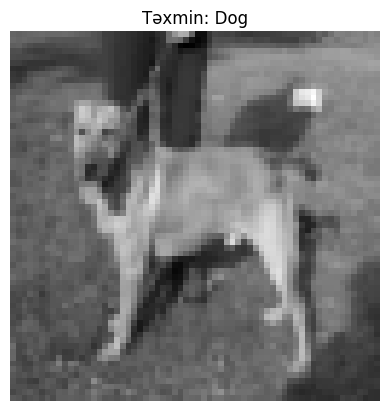

In [9]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize

# Test üçün bir şəkil yükləmək
test_image_path = r"Dataset/dogs/dog.1005.jpg"  # Burada test şəkilinizin yolunu daxil edin
test_image = imread(test_image_path)
test_image_gray = rgb2gray(resize(test_image, (64, 64)))

# Şəkildən HOG xüsusiyyətlərini çıxarmaq
test_hog_features = apply_hog(test_image_gray).reshape(1, -1)  # Xüsusiyyətləri 2D massivə çevirmək

# Model ilə təxmin etmək
predicted_label = knn.predict(test_hog_features)

# Nəticəni göstərmək
class_names = ["Cat", "Dog"]  # Etiketlər üçün sinif adları
predicted_class = class_names[predicted_label[0]]

print(f"Təxmin edilən sinif: {predicted_class}")

# Şəkli vizual olaraq göstərmək
import matplotlib.pyplot as plt

plt.imshow(test_image_gray, cmap="gray")
plt.title(f"Təxmin: {predicted_class}")
plt.axis("off")
plt.show()

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1. Dataseti təlim və test dəstlərinə bölmək
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

# 2. Decision Tree modeli yaratmaq
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# 3. Test dəstində təxmin etmək
y_pred = decision_tree.predict(X_test)

# 4. Qiymətləndirmə
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelin dəqiqliyi: {accuracy * 100:.2f}%")
print("\nƏtraflı Qiymətləndirmə:")
print(classification_report(y_test, y_pred))


Modelin dəqiqliyi: 57.84%

Ətraflı Qiymətləndirmə:
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       819
           1       0.57      0.57      0.57       782

    accuracy                           0.58      1601
   macro avg       0.58      0.58      0.58      1601
weighted avg       0.58      0.58      0.58      1601



In [11]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(decision_tree, X_train, y_train, cv=5)
print(f"Kross-validayasiya dəqiqliyi: {np.mean(scores) * 100:.2f}%")

Kross-validayasiya dəqiqliyi: 58.06%


In [12]:
importances = decision_tree.feature_importances_
print("Xüsusiyyətlərin əhəmiyyəti:", importances)

Xüsusiyyətlərin əhəmiyyəti: [0.00284462 0.00052053 0.         ... 0.         0.         0.0009786 ]


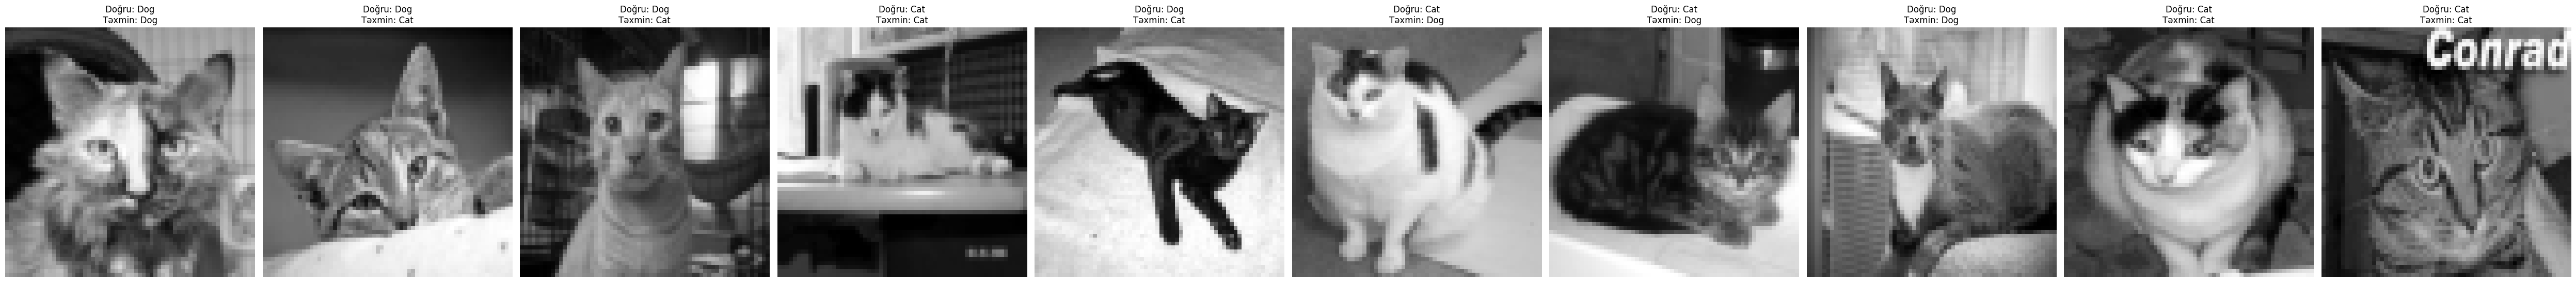

In [13]:
import matplotlib.pyplot as plt

# Təsadüfi bir neçə test nümunəsi seçmək
random_indices = np.random.choice(len(X_test), 10, replace=False)
selected_images = X_test[random_indices]
selected_labels = y_test[random_indices]

# Şəkillərdən HOG xüsusiyyətlərini çıxarmaq artıq lazım deyil (onlar artıq `X_test`-dədir)
predicted_labels = decision_tree.predict(selected_images)

# Sinif adları
class_names = ["Cat", "Dog"]

# Vizual nəticələri göstərmək
fig, axes = plt.subplots(1, len(selected_images), figsize=(50,10))
for i, ax in enumerate(axes):
    ax.imshow(images[random_indices[i]], cmap="gray")  # Əsl şəkili göstərmək üçün orijinal şəkildən istifadə olunur
    ax.set_title(f"Doğru: {class_names[selected_labels[i]]}\nTəxmin: {class_names[predicted_labels[i]]}")
    ax.axis("off")

plt.tight_layout()
plt.show()


Random Forest ilə Klassifikasiya


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1. Dataseti təlim və test dəstlərinə bölmək
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

# 2. Random Forest modeli yaratmaq
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# 3. Test dəstində təxmin etmək
y_pred = random_forest.predict(X_test)

# 4. Qiymətləndirmə
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelin dəqiqliyi: {accuracy * 100:.2f}%")
print("\nƏtraflı Qiymətləndirmə:")
print(classification_report(y_test, y_pred))


Modelin dəqiqliyi: 71.46%

Ətraflı Qiymətləndirmə:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       819
           1       0.72      0.67      0.70       782

    accuracy                           0.71      1601
   macro avg       0.72      0.71      0.71      1601
weighted avg       0.72      0.71      0.71      1601



Nəticə

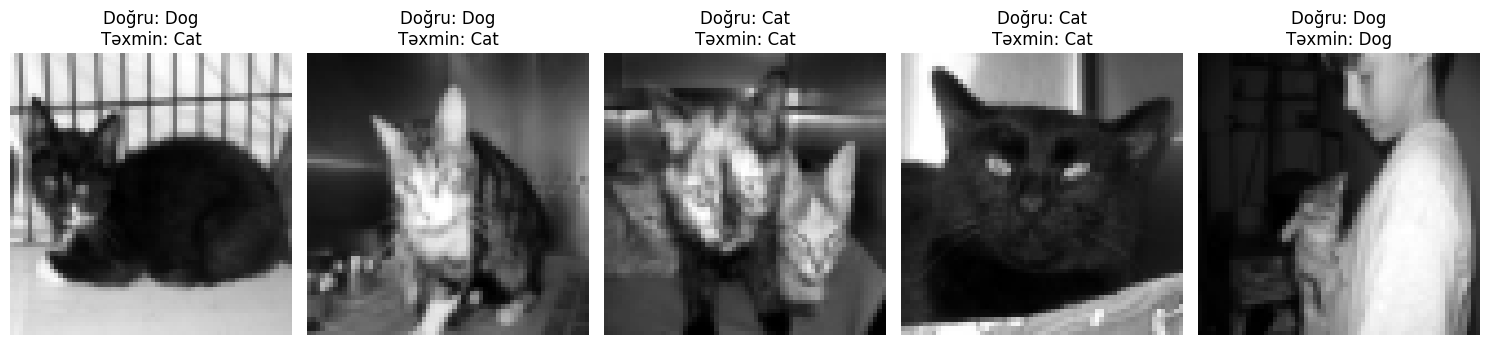

In [15]:
# Təsadüfi bir neçə test nümunəsi seçmək
random_indices = np.random.choice(len(X_test), 5, replace=False)
selected_images = X_test[random_indices]
selected_labels = y_test[random_indices]

# Random Forest ilə təxminlər
predicted_labels = random_forest.predict(selected_images)

# Sinif adları
class_names = ["Cat", "Dog"]

# Vizual nəticələri göstərmək
fig, axes = plt.subplots(1, len(selected_images), figsize=(15, 5))
for i, ax in enumerate(axes):
    # Test nümunələrinin orijinal şəkilləri (şəkil massivindən)
    original_index = np.where(hog_features == selected_images[i])[0][100]
    ax.imshow(images[original_index], cmap="gray")  # Əsl şəkili göstərmək üçün orijinal şəkildən istifadə olunur
    ax.set_title(f"Doğru: {class_names[selected_labels[i]]}\nTəxmin: {class_names[predicted_labels[i]]}")
    ax.axis("off")

plt.tight_layout()
plt.show()


GradientBoostingClassifier

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Dataseti təlim və test dəstlərinə bölmək
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

# 2. Gradient Boosting modeli yaratmaq
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)

# 3. Test dəstində təxmin etmək
y_pred = gradient_boosting.predict(X_test)

# 4. Qiymətləndirmə
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelin dəqiqliyi: {accuracy * 100:.2f}%")
print("\nƏtraflı Qiymətləndirmə:")
print(classification_report(y_test, y_pred))


Modelin dəqiqliyi: 73.02%

Ətraflı Qiymətləndirmə:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       819
           1       0.72      0.73      0.72       782

    accuracy                           0.73      1601
   macro avg       0.73      0.73      0.73      1601
weighted avg       0.73      0.73      0.73      1601



Digər Gradient alqoritmalarını tətbiq edərək nəticəyə baxa bilərsiniz

XGBoost



In [18]:
#import xgboost as xgb
#model = xgb.XGBClassifier(n_estimators=100, random_state=42)
#model.fit(X_train, y_train)

Lightgbm

In [19]:
#import lightgbm as lgb
#model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
#model.fit(X_train, y_train)


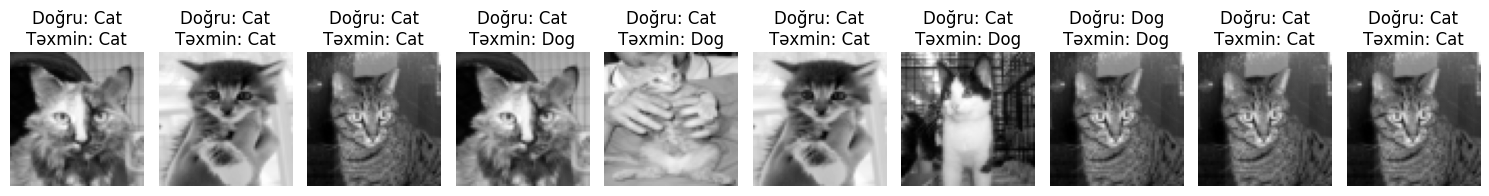

In [20]:
# Təsadüfi bir neçə test nümunəsi seçmək
random_indices = np.random.choice(len(X_test), 10, replace=False)
selected_images = X_test[random_indices]
selected_labels = y_test[random_indices]

# Gradient Boosting ilə təxminlər
predicted_labels = gradient_boosting.predict(selected_images)

# Sinif adları
class_names = ["Cat", "Dog"]

# Vizual nəticələri göstərmək
fig, axes = plt.subplots(1, len(selected_images), figsize=(15, 5))
for i, ax in enumerate(axes):
    # Test nümunələrinin orijinal şəkilləri (şəkil massivindən)
    original_index = np.where(hog_features == selected_images[i])[0][0]
    ax.imshow(images[original_index], cmap="gray")  # Əsl şəkili göstərmək üçün orijinal şəkildən istifadə olunur
    ax.set_title(f"Doğru: {class_names[selected_labels[i]]}\nTəxmin: {class_names[predicted_labels[i]]}")
    ax.axis("off")

plt.tight_layout()
plt.show()


Sadə neyron şəbəkəsi vasitəsilə klassifikasiya edək

In [23]:
from sklearn.preprocessing import StandardScaler
image_size = (128, 128)  # Şəkil ölçüsünü artırmaq
images = []
labels = []

# Qovluqlardan şəkilləri yükləmək
for label, directory in enumerate([cats_dir, dogs_dir]):
    for file in os.listdir(directory):
        if file.endswith(('.png', '.jpg', '.jpeg')):  # Yalnız şəkil fayllarını nəzərə al
            img_path = os.path.join(directory, file)
            img = imread(img_path)
            img_gray = rgb2gray(resize(img, image_size))  # Şəkili ölçüləndirmək və boz tonlara çevirmək
            images.append(img_gray)
            labels.append(label)

images = np.array(images)
labels = np.array(labels)

# 2. HOG xüsusiyyətlərini tətbiq etmək
def apply_hog(image):
    return hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)

hog_features = np.array([apply_hog(img) for img in images])

# 3. HOG xüsusiyyətlərini standartlaşdırmaq
scaler = StandardScaler()
hog_features = scaler.fit_transform(hog_features)
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)


In [ ]:
##SimpleNN

# 5. Neural Network Tərifi
def sigmoid(x):
    # Numerik stabillik üçün böyük dəyərləri yoxlayırıq
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Şəbəkə Parametrləri
input_size = X_train.shape[1]
hidden_size = 128  # Daha böyük gizli qat
output_size = 1
learning_rate = 0.001

# Parametrlərin İxtiyari Başlanğıcı
np.random.seed(42)
weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
bias_hidden = np.zeros((1, hidden_size))
bias_output = np.zeros((1, output_size))

# Təlim
epochs = 2000  # Daha çox epoch
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    hidden_layer_output = relu(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)

    # Xəta Hesabı
    error = y_train.reshape(-1, 1) - output_layer_output

    # Backpropagation
    d_output = error * sigmoid_derivative(output_layer_output)
    d_hidden = np.dot(d_output, weights_hidden_output.T) * relu_derivative(hidden_layer_output)

    # Parametrlərin Yenilənməsi
    weights_hidden_output += np.dot(hidden_layer_output.T, d_output) * learning_rate
    weights_input_hidden += np.dot(X_train.T, d_hidden) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    # İrəliləyiş Çapı
    if epoch % 100 == 0:
        loss = np.mean(error ** 2)
        print(f"Epoch {epoch}/{epochs}, Loss: {loss:.4f}")





Test

In [ ]:
import matplotlib.pyplot as plt

# 5 Test Şəkili Seçmək
num_test_samples = 1
for i in range(num_test_samples):
    # Random şəkildə 5 şəkil seçirik
    sample_index = random_indices[i]  # Random seçilmiş şəkilin indeksi
    sample_image = images[sample_index]  # HOG xüsusiyyətləri tətbiq edilmiş şəkil
    prediction = predictions[i]  # Sinifləndirmə nəticəsi
    
    # Test şəkilinin əsl dəyəri (label)
    true_label = labels[sample_index]
    
    # Sinifləndirmə dəqiqliyi (score) hesablanır
    score = 100 * (prediction == true_label)
    
    # Şəkili göstərmək
    plt.figure(figsize=(5, 5))
    plt.imshow(sample_image, cmap='gray')
    plt.title(f"Predicted: {'Cat' if prediction == 0 else 'Dog'} | True: {'Cat' if true_label == 0 else 'Dog'} | Score: {score}%")
    plt.show()

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# 4. Şəbəkə Parametrləri
input_size = X_train.shape[1]
hidden_size = 32  # Gizli qat ölçüsü
output_size = 1
learning_rate = 0.01
lambda_reg = 0.01  # L2 regularization (Ridge)
dropout_rate = 0.5  # Dropout nisbəti

# 5. Parametrlərin İxtiyari Başlanğıcı
np.random.seed(42)
weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
bias_hidden = np.zeros((1, hidden_size))
bias_output = np.zeros((1, output_size))

# 6. Dropout tətbiqi
def dropout(x, rate=0.5):
    mask = np.random.binomial(1, 1 - rate, size=x.shape)
    return x * mask

# 7. Təlim
epochs = 1000  # Epoch sayını artırırıq
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    hidden_layer_output = relu(hidden_layer_input)
    hidden_layer_output = dropout(hidden_layer_output, rate=dropout_rate)  # Dropout tətbiqi

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)

    # Xəta Hesabı
    error = y_train.reshape(-1, 1) - output_layer_output

    # Backpropagation
    d_output = error * sigmoid_derivative(output_layer_output)
    d_hidden = np.dot(d_output, weights_hidden_output.T) * relu_derivative(hidden_layer_output)

    # Parametrlərin Yenilənməsi (L2 regularization əlavə olunur)
    weights_hidden_output += np.dot(hidden_layer_output.T, d_output) * learning_rate - lambda_reg * weights_hidden_output
    weights_input_hidden += np.dot(X_train.T, d_hidden) * learning_rate - lambda_reg * weights_input_hidden
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    # Təlim prosesi boyunca itkiyi çap etmək
    if epoch % 100 == 0:
        loss = np.mean(error ** 2)
        print(f"Epoch {epoch}/{epochs}, Loss: {loss:.4f}")

In [ ]:
import matplotlib.pyplot as plt

# 5 Test Şəkili Seçmək
num_test_samples = 5
for i in range(num_test_samples):
    # Random şəkildə 5 şəkil seçirik
    sample_index = random_indices[i]  # Random seçilmiş şəkilin indeksi
    sample_image = images[sample_index]  # HOG xüsusiyyətləri tətbiq edilmiş şəkil
    prediction = predictions[i]  # Sinifləndirmə nəticəsi
    
    # Test şəkilinin əsl dəyəri (label)
    true_label = labels[sample_index]
    
    # Sinifləndirmə dəqiqliyi (score) hesablanır
    score = 100 * (prediction == true_label)
    
    # Şəkili göstərmək
    plt.figure(figsize=(5, 5))
    plt.imshow(sample_image, cmap='gray')
    plt.title(f"Predicted: {'Cat' if prediction == 0 else 'Dog'} | True: {'Cat' if true_label == 0 else 'Dog'} | Score: {score}%")
    plt.show()

Keras kitabxanası ilə GPU istifadə edərək təlimi yerinə yetirək

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# HOG xüsusiyyətləri və etiketlərinizin olduğunu düşünək
# hog_features - HOG xüsusiyyətləri
# labels - Etiketlər (0 - Pişik, 1 - İt)
# 3. Modelin qurulması
model = Sequential()
# Gizli qat (Hidden Layer) əlavə edirik, L2 regularization tətbiq edirik
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
# Dropout qatını əlavə edirik
model.add(Dropout(0.5))
# Çıxış qatını əlavə edirik (sigmoid aktivasiya funksiyası)
model.add(Dense(1, activation='sigmoid'))
# 4. Modeli tərtib edirik
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
# 5. Modeli təlim edirik
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
# 6. Modelin test edilməsi
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")
# 7. Təlim tarixi və dəqiqlik
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [ ]:
# 8. Test üçün bir neçə şəkili təsadüfi seçib proqnozları çap edirik
predictions = (model.predict(X_test) > 0.5).astype(int).flatten()

# İlk 5 test şəkilini göstəririk
for i in range(10):
    # X_test-dəki şəkilin orijinal indexini alırıq
    sample_image = images[i]  # Test üçün istifadə edilən şəkilin orijinal versiyasını göstəririk
    plt.imshow(sample_image, cmap='gray')
    plt.title(f"Predicted: {'Cat' if predictions[i] == 0 else 'Dog'}")
    plt.show()
